<a href="https://colab.research.google.com/github/DhanvinS/Projects/blob/main/An%20Analysis%20of%20all%20models/LR%2C_KNN%2C_Naive_Bayes%2C_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [ ]:
from google.colab import files
dataset = files.upload()

Saving DiabetesData.csv to DiabetesData.csv


In [ ]:
df = pd.read_csv("DiabetesData.csv")

# Assigning attibutes and target variables
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Standardizing the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# for Multinomial NB as it cannot handle negative input values
scaler_mm = MinMaxScaler()
x_train_mm = scaler_mm.fit_transform(x_train)
x_test_mm = scaler_mm.transform(x_test)

In [ ]:
"""
In this function I run the experiment by repeatedly training and testing the given model on
 random subsets of  m  features, tracking accuracy each time. I  then return the list of
 accuracies, the best observed accuracy, and the subset of features that gave the best result.
"""

def run_experiment(model, x_train_scaled, x_test_scaled, y_train, y_test, m):
  accuracies = []
  best_accuracy = 0
  best_features = None
  feature_indices = list(range(x_train_scaled.shape[1]))

  for i in range(100):
    selected_features = random.sample(feature_indices, m)

    model.fit(x_train_scaled[ : , selected_features], y_train)
    y_predicted = model.predict(x_test_scaled[ : ,selected_features])
    acc = accuracy_score(y_test, y_predicted)
    accuracies.append(acc)

    if acc > best_accuracy:
      best_accuracy = acc
      best_features = selected_features

  return accuracies, best_accuracy, best_features

In [ ]:
models = {
    "Logiestic Regression": LogisticRegression(max_iter = 1000),
    "KNN": KNeighborsClassifier(n_neighbors = 11),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    #"SVM": SVC(kernel='rbf', random_state=42), coudnt use this cuz it took 6 hrs but still didnt converge

    "Linear SVM": LinearSVC(max_iter=10000)
}

**FOR SVM using **

Kernel: Linear (no kernel trick applied, only linear decision boundaries allowed)

Loss function: Squared hinge loss (by default)

Penalty: L2 regularization (by default)

Solver: Liblinear (optimization algorithm used internally)

In [ ]:
# Running models for m = 3 and 7

results = {}

for model_name, model in models.items():
    print(f"\n🔹 Model: {model_name}")
    results[model_name] = {}
    for m in [3, 7]:
        # Choose the right data based on model
        if model_name == "Naive Bayes (Multinomial)":
            accuracies, best_acc, best_features = run_experiment(
                model, x_train_mm, x_test_mm, y_train, y_test, m
            )
        else:
            accuracies, best_acc, best_features = run_experiment(
                model, x_train_scaled, x_test_scaled, y_train, y_test, m
            )

        results[model_name][m] = (accuracies, best_acc, best_features)
        print(f"  m={m}: Max Accuracy={best_acc:.4f}, Best Features={best_features}")


🔹 Model: Logiestic Regression
  m=3: Max Accuracy=0.8560, Best Features=[11, 4, 14]
  m=7: Max Accuracy=0.8575, Best Features=[14, 12, 8, 11, 7, 15, 0]

🔹 Model: KNN
  m=3: Max Accuracy=0.9139, Best Features=[14, 15, 11]
  m=7: Max Accuracy=0.8839, Best Features=[4, 12, 15, 8, 14, 11, 2]

🔹 Model: Naive Bayes (Gaussian)
  m=3: Max Accuracy=0.8712, Best Features=[14, 11, 12]
  m=7: Max Accuracy=0.8711, Best Features=[9, 14, 8, 6, 11, 3, 12]

🔹 Model: Naive Bayes (Multinomial)
  m=3: Max Accuracy=0.5966, Best Features=[8, 5, 11]
  m=7: Max Accuracy=0.5967, Best Features=[14, 11, 0, 3, 12, 13, 8]

🔹 Model: Linear SVM
  m=3: Max Accuracy=0.8524, Best Features=[14, 15, 13]
  m=7: Max Accuracy=0.8547, Best Features=[15, 10, 0, 7, 11, 9, 14]


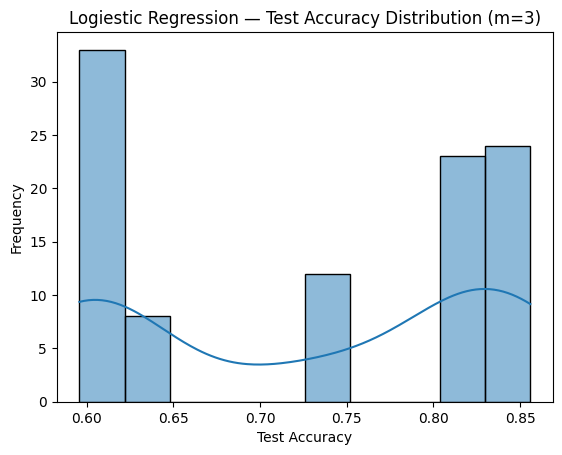

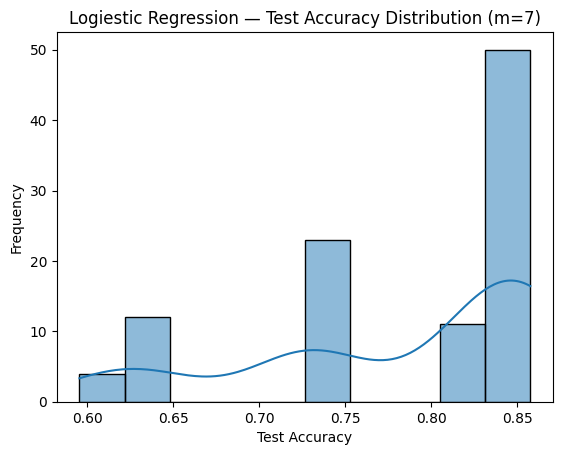

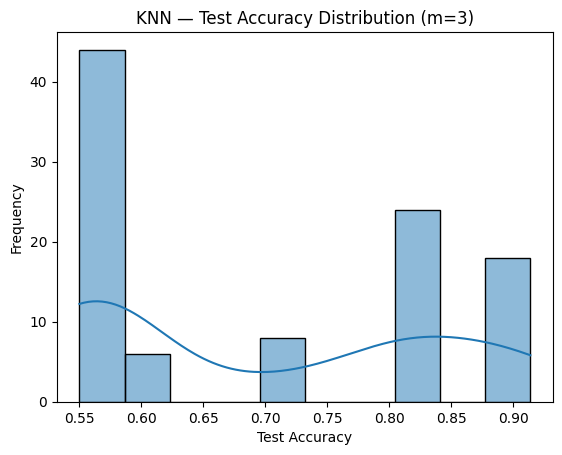

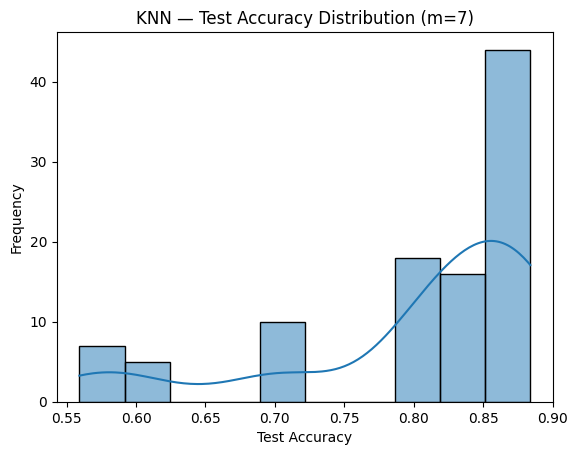

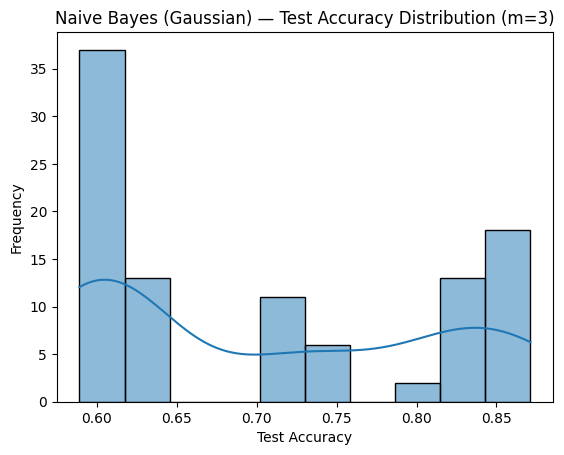

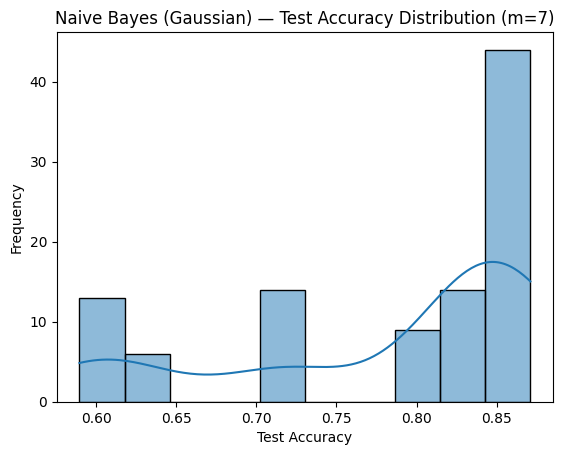

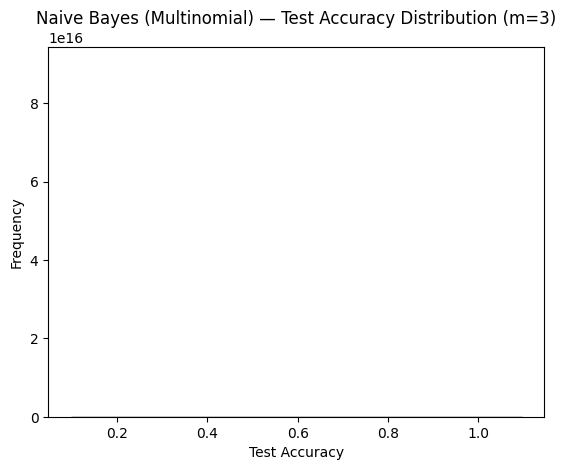

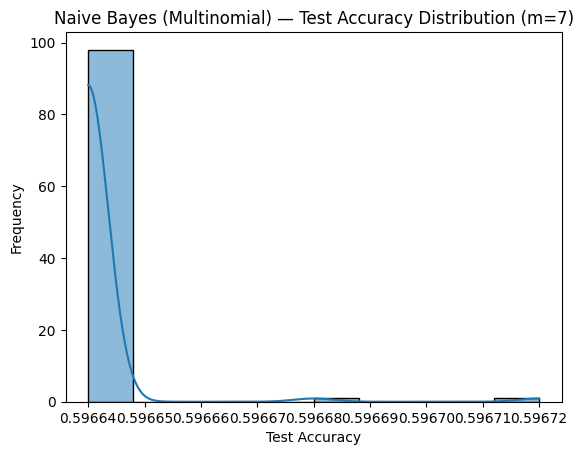

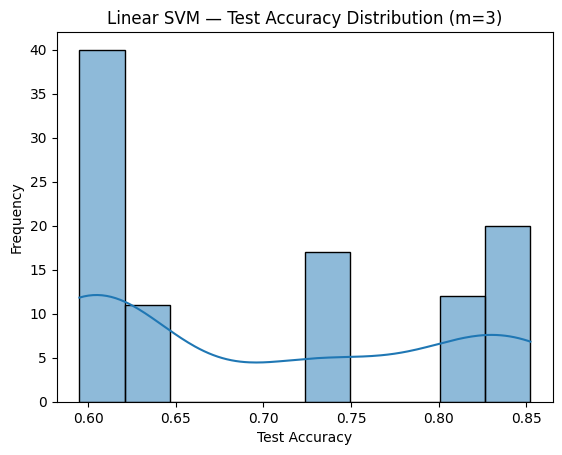

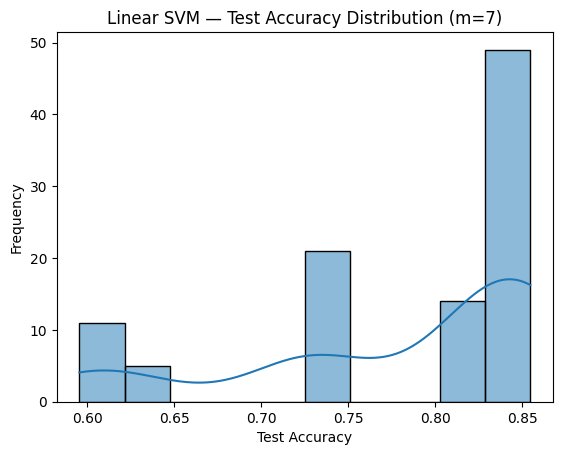

In [ ]:
# Plotting histograms for each model

for model_name in models.keys():
  for m in [3, 7]:
     accs = results[model_name][m][0]
     sb.histplot(accs, bins=10, kde=True)
     plt.title(f'{model_name} — Test Accuracy Distribution (m={m})')
     plt.xlabel('Test Accuracy')
     plt.ylabel('Frequency')
     plt.show()

In [ ]:
# Summarizing the best results

summary = []
for model_name in models.keys():
    for m in [3, 7]:
        accs, max_acc, features = results[model_name][m]
        summary.append({
            'Model': model_name,
            'm': m,
            'Max Accuracy': round(max_acc, 4),
            'Best Features': features
        })

summary_df = pd.DataFrame(summary)
summary_df


,Model,m,Max Accuracy,Best Features
0,Logiestic Regression,3,0.8560,"[11, 4, 14]"
1,Logiestic Regression,7,0.8575,"[14, 12, 8, 11, 7, 15, 0]"
2,KNN,3,0.9139,"[14, 15, 11]"
3,KNN,7,0.8839,"[4, 12, 15, 8, 14, 11, 2]"
4,Naive Bayes (Gaussian),3,0.8712,"[14, 11, 12]"
5,Naive Bayes (Gaussian),7,0.8711,"[9, 14, 8, 6, 11, 3, 12]"
6,Naive Bayes (Multinomial),3,0.5966,"[8, 5, 11]"
7,Naive Bayes (Multinomial),7,0.5967,"[14, 11, 0, 3, 12, 13, 8]"
8,Linear SVM,3,0.8524,"[14, 15, 13]"
9,Linear SVM,7,0.8547,"[15, 10, 0, 7, 11, 9, 14]"
